In [1]:
import numpy as np # linear algebra
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.shape

(214, 10)

In [4]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


In [6]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [7]:
df.shape

(214, 10)

In [8]:
df['Type'].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [9]:
df['Type'].value_counts().sort_index(ascending=True)

Type
1    70
2    76
3    17
5    13
6     9
7    29
Name: count, dtype: int64

In [10]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [11]:
df['Type'].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

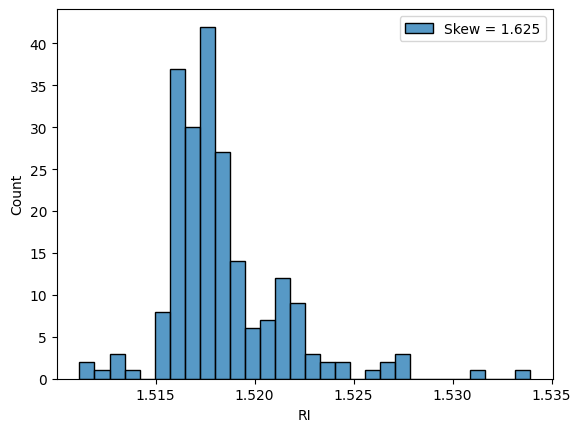

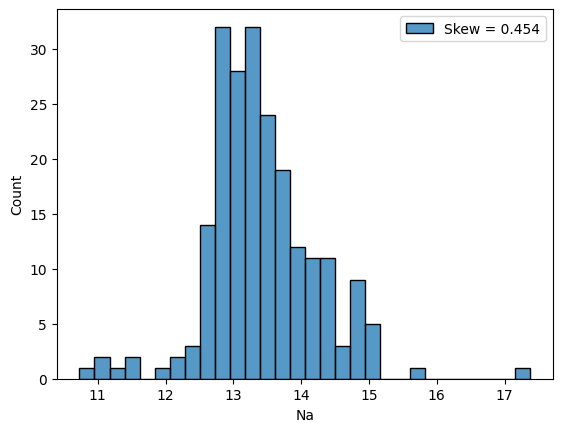

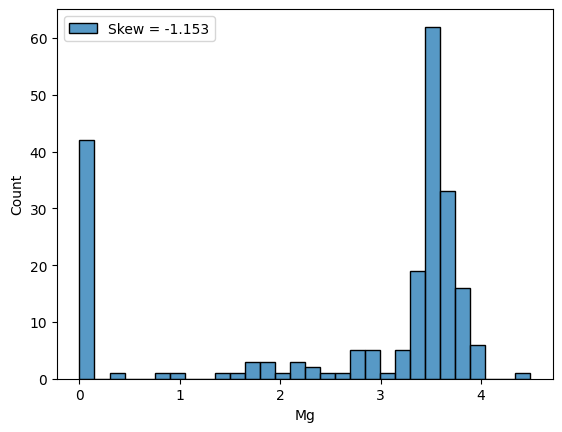

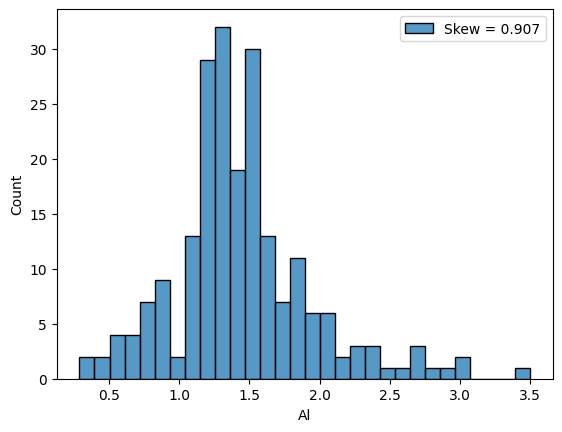

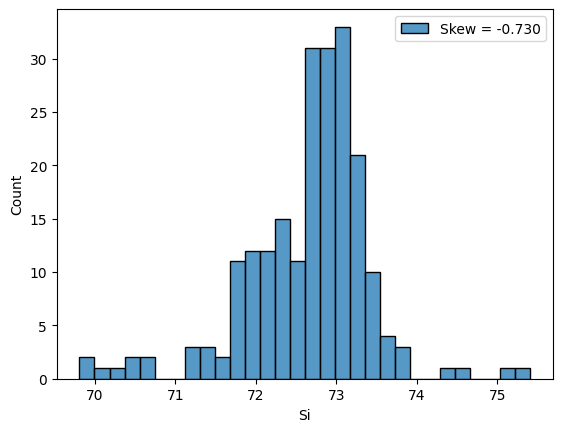

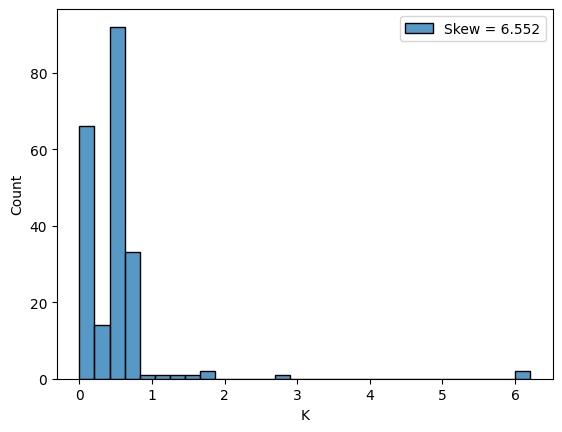

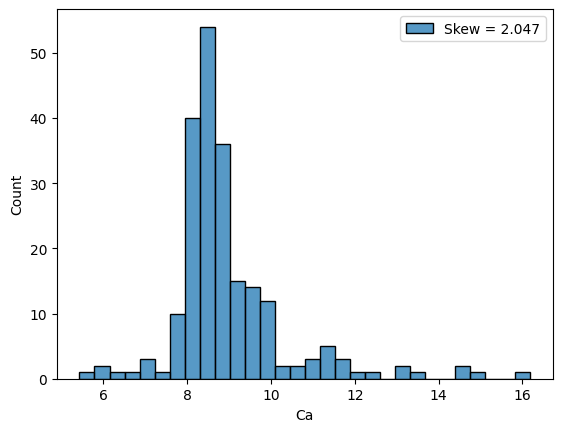

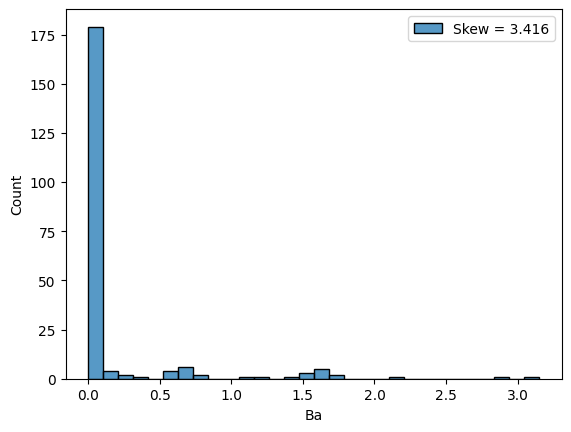

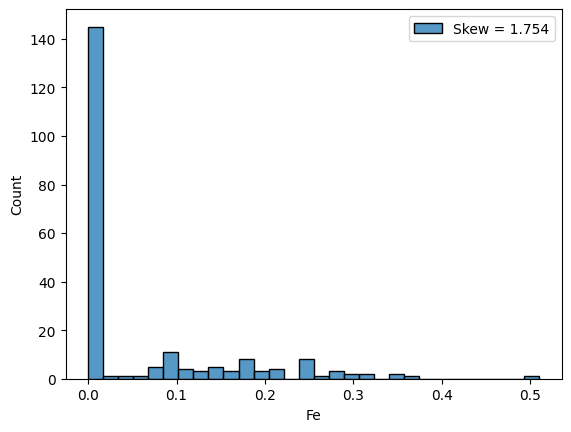

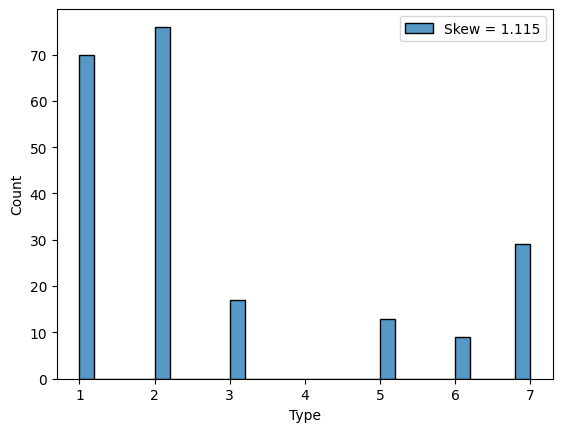

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
features = df.columns  # Define your features, or specify them as a list

# Data visualization
for feat in features:
    skew = df[feat].skew()
    sns.histplot(df[feat], kde=False, label=f'Skew = {skew:.3f}', bins=30)  # Use sns.histplot as sns.distplot is deprecated
    plt.legend(loc='best')
    plt.show()


In [13]:
import numpy as np
import pandas as pd
from collections import Counter  # Import Counter for counting occurrences

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features (columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col], 75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # Outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        
        # Append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
    
    # Count occurrences of outliers
    outlier_indices = Counter(outlier_indices)
    
    # Select observations containing more than 2 outliers
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

# Example usage
# Ensure 'features' is defined as a list of column names from your dataframe
features = df.columns  # Or specify columns explicitly
print('The dataset contains %d observations with more than 2 outliers' % (len(outlier_hunt(df[features]))))


The dataset contains 25 observations with more than 2 outliers


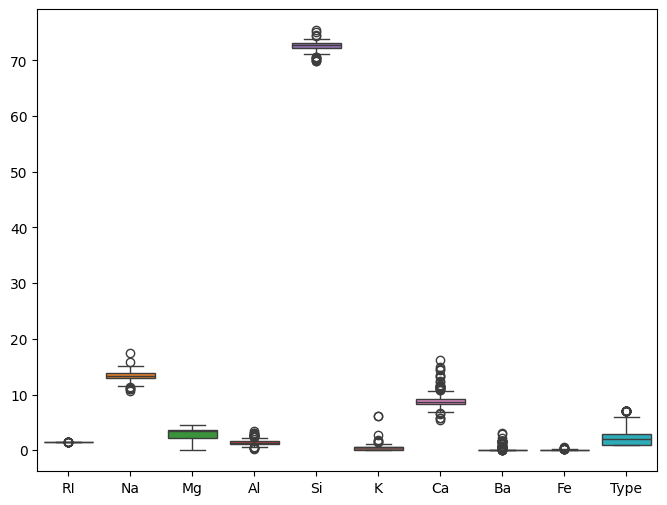

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(df[features])
plt.show()

C:\Users\Bharath Yadav\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Bharath Yadav\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Bharath Yadav\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Bharath Yadav\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Bharath Yadav\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palett

<Figure size 800x800 with 0 Axes>

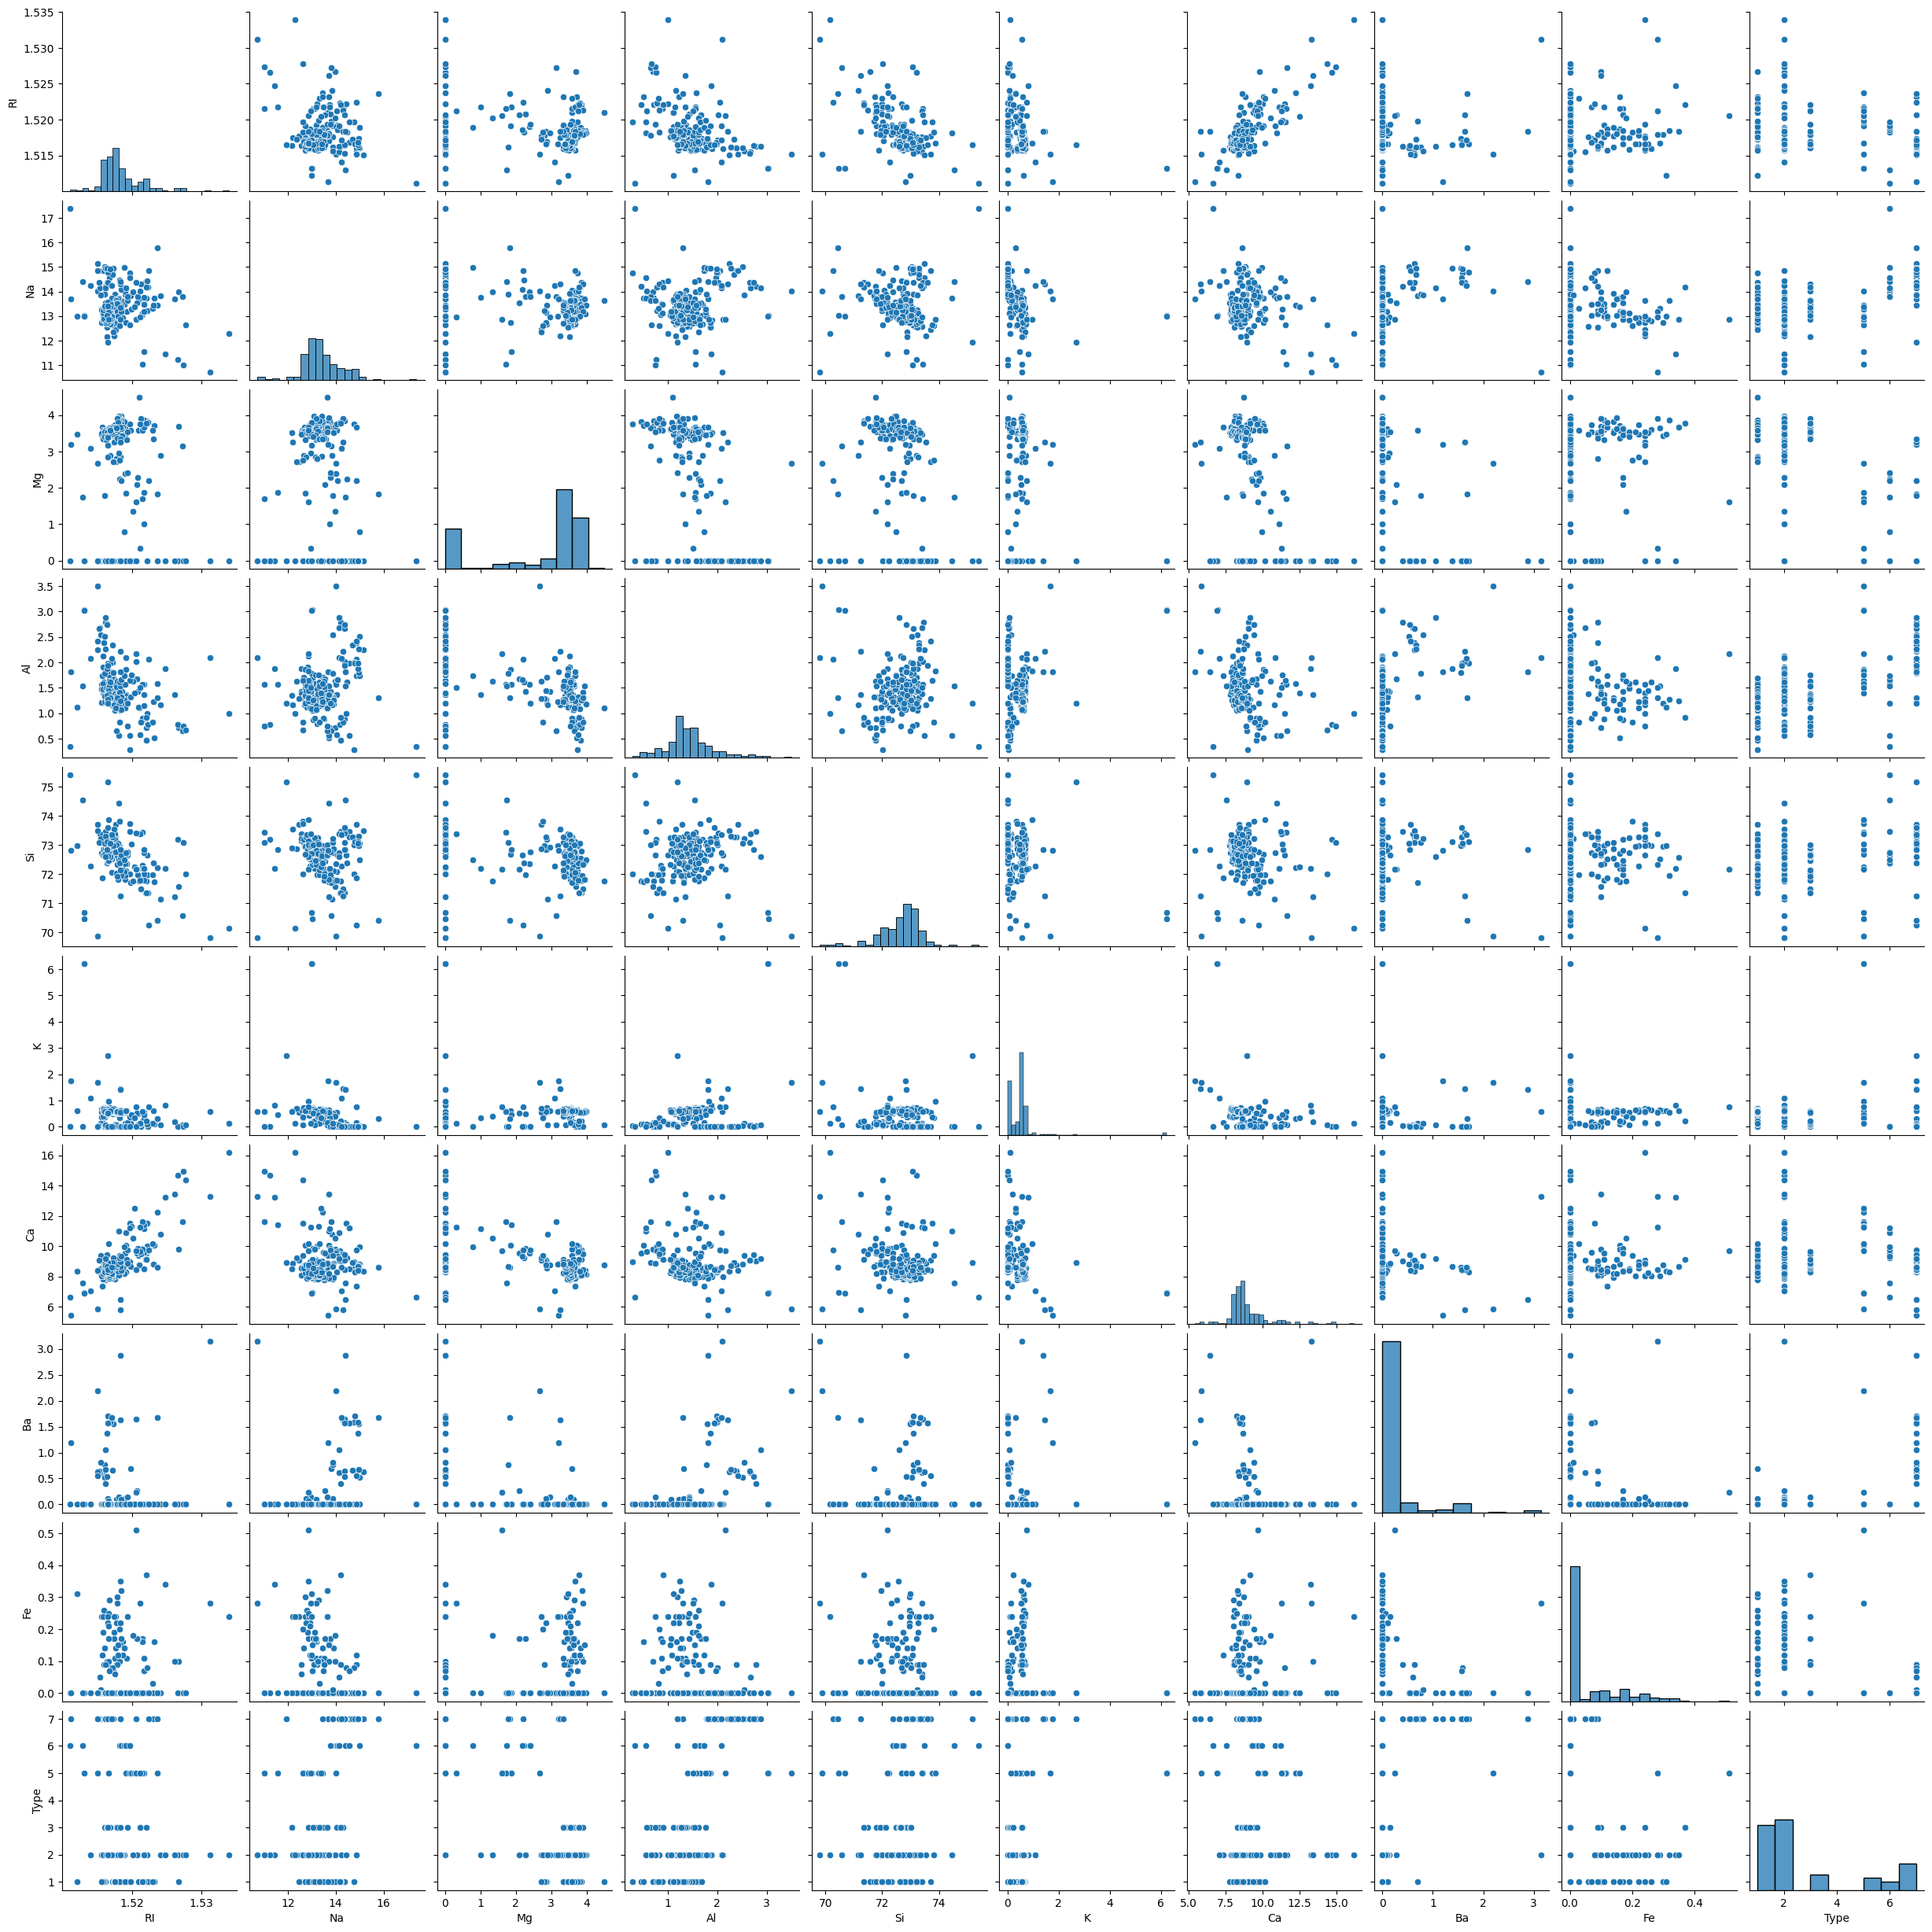

In [15]:
plt.figure(figsize=(8,8))
sns.pairplot(df[features],palette='coolwarm')
plt.show()

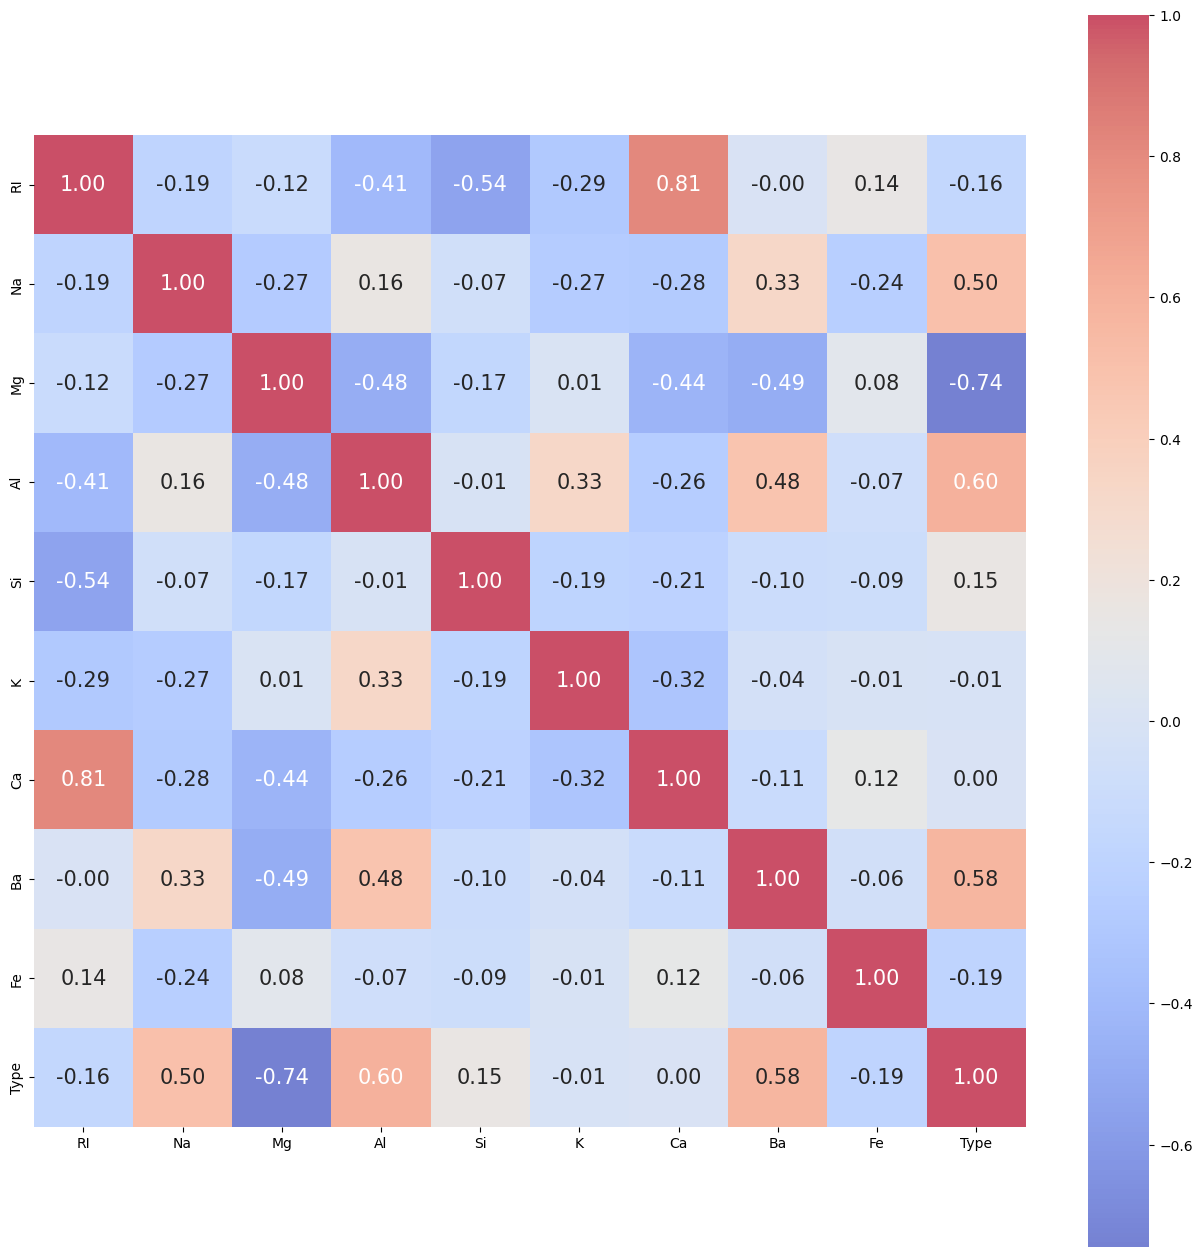

In [16]:
corr = df[features].corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features, yticklabels= features, alpha = 0.7,   cmap= 'coolwarm')
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [18]:
outlier_indices = outlier_hunt(df[features])
df = df.drop(outlier_indices).reset_index(drop=True)
print(df.shape)

(189, 10)


C:\Users\Bharath Yadav\AppData\Local\Temp\ipykernel_5256\4266715662.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feat], kde=False, label='Skew = %.3f' %(skew), bins=30)


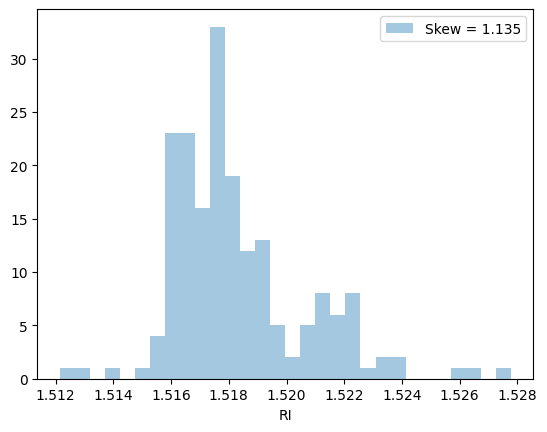

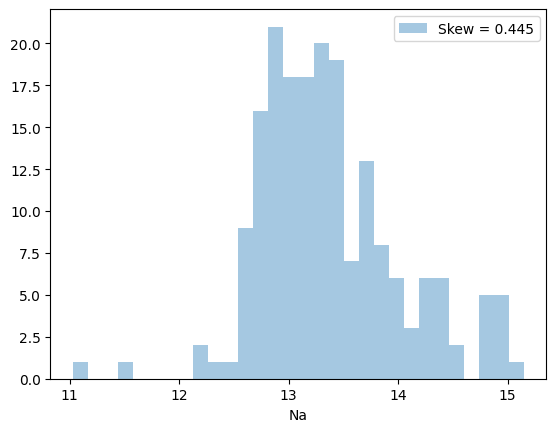

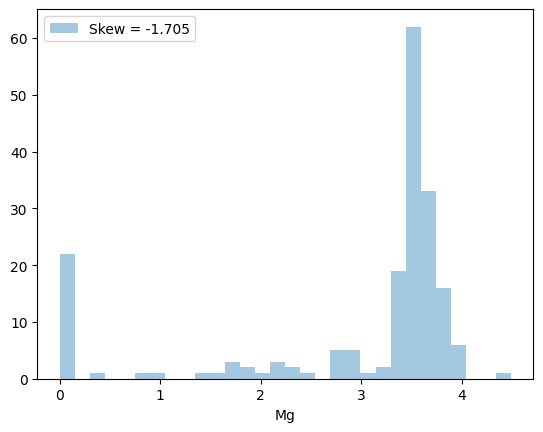

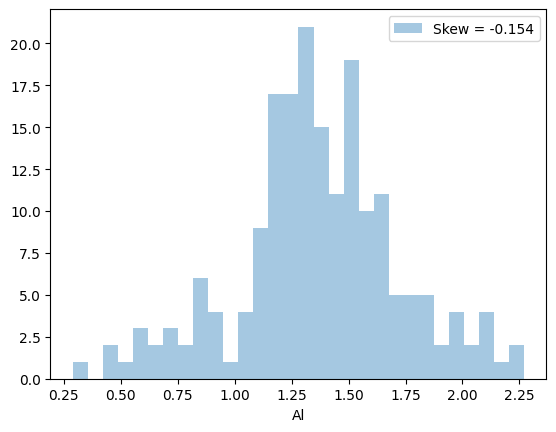

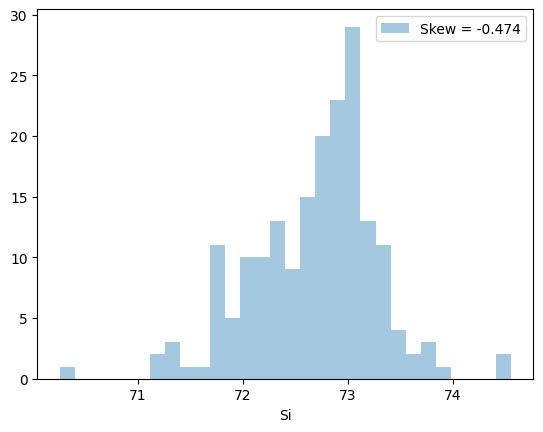

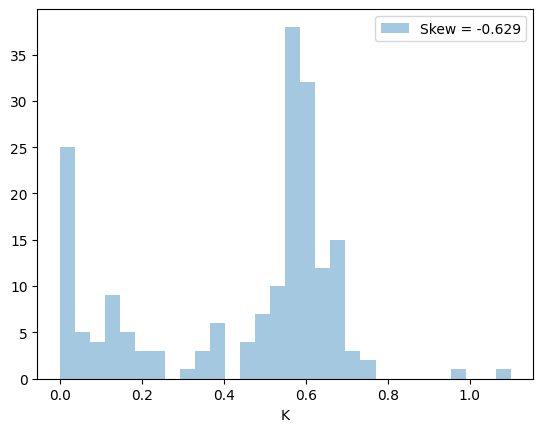

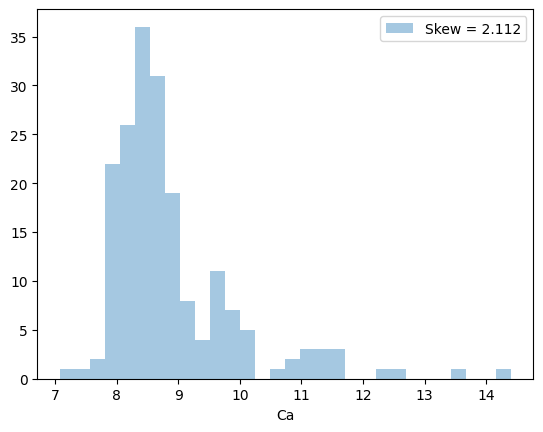

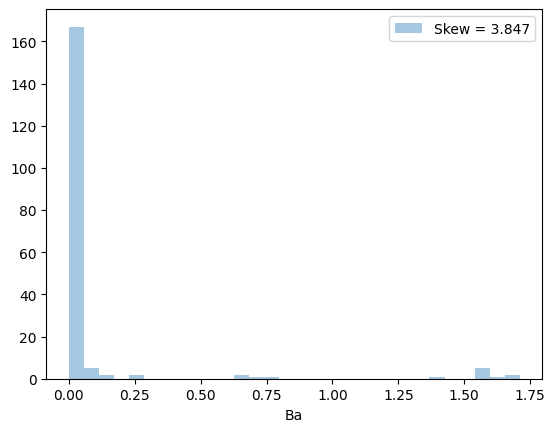

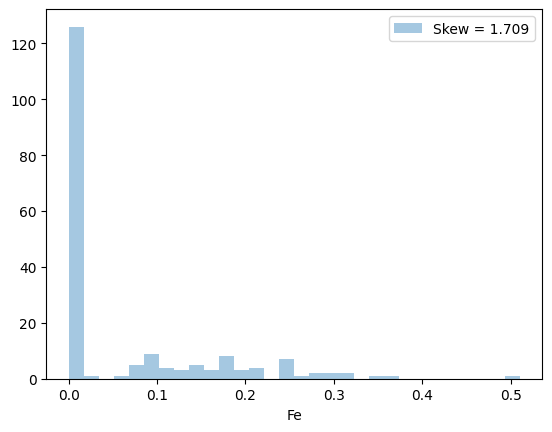

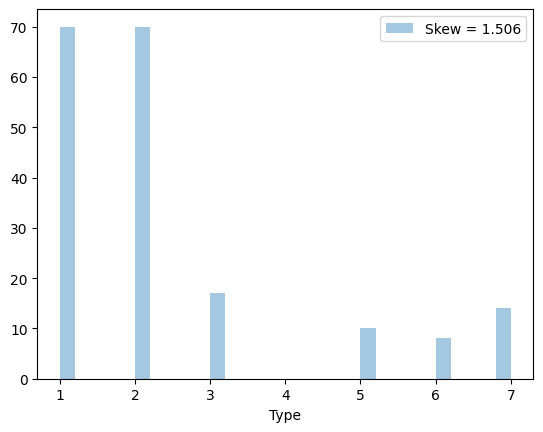

In [19]:
for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde=False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [20]:
df['Type'].value_counts()

Type
1    70
2    70
3    17
7    14
5    10
6     8
Name: count, dtype: int64

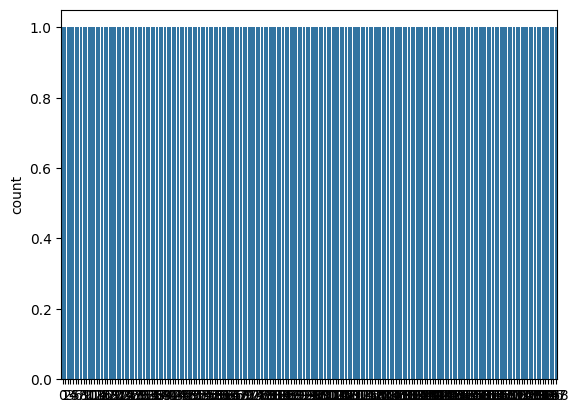

In [21]:
sns.countplot(df['Type'])
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
X = df[features] 
y = df['Type'] 
# set a seed and a test size for splitting the dataset 
seed = 7
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size , random_state = seed)

In [26]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier

model = RandomForestClassifier(n_estimators =25,max_features = "log2",
                                  criterion = "entropy",bootstrap = False,max_depth = 15,
                                  min_samples_split = 5,min_samples_leaf = 3)
model.fit(X_train, y_train)

# Step 2: Make predictions on the test set using the trained model

Y_pred_train   = model.predict(X_train)
Y_pred_test    = model.predict(X_test)

# Step 3: Evaluate the model using a classification report and print the report
report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:")
print(report_rf)

Random Forest Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00         4
           5       0.50      1.00      0.67         1
           6       0.00      0.00      0.00         1
           7       0.80      0.80      0.80         5

    accuracy                           0.95        38
   macro avg       0.72      0.80      0.74        38
weighted avg       0.93      0.95      0.94        38



C:\Users\Bharath Yadav\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Bharath Yadav\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Bharath Yadav\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [29]:
# Make predictions on the training and test sets
y_pred_rf = model.predict(X_train)  # Predictions for training set
Y_pred_test = model.predict(X_test)  # Predictions for test set

# Now calculate the accuracy scores
score1 = accuracy_score(y_train, y_pred_rf)  # Training accuracy
print("Training Accuracy score:", np.round(score1, 3))

score2 = accuracy_score(y_test, Y_pred_test)  # Test accuracy
print("Test Accuracy score:", np.round(score2, 3))


Training Accuracy score: 1.0
Test Accuracy score: 0.974


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Create a BaggingClassifier with a DecisionTreeClassifier as the base estimator
RF_model = RandomForestClassifier(n_estimators=100, random_state=42,
                                  max_features=0.8,max_samples=0.7, max_depth=10)

training_acc = []
test_acc = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test  =  train_test_split(X,y, test_size=0.3,random_state=i)
    RF_model.fit(X_train, Y_train)
    Y_pred_train   = RF_model.predict(X_train)
    Y_pred_test    = RF_model.predict(X_test)
    training_acc.append(accuracy_score(Y_train, Y_pred_train))
    test_acc.append(accuracy_score(Y_test, Y_pred_test))

print("Cross validation-Random Forest-Training accuracy",np.round(np.mean(training_acc),2))
print("Cross validation-Random Forest-Test accuracy",np.round(np.mean(test_acc),2))


Cross validation-Random Forest-Training accuracy 1.0
Cross validation-Random Forest-Test accuracy 0.99


In [31]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Define the AdaBoostClassifier with RandomForest as the base estimator
boosting_model = AdaBoostClassifier(
    estimator=RandomForestClassifier(n_estimators=10, random_state=42),  # Base learner
    n_estimators=50,  # Number of boosting iterations
    random_state=42
)

# Initialize lists to store accuracies
training_acc = []
test_acc = []

# Perform cross-validation over different random states
for i in range(1, 101):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    boosting_model.fit(X_train, Y_train)
    Y_pred_train = boosting_model.predict(X_train)
    Y_pred_test = boosting_model.predict(X_test)
    training_acc.append(accuracy_score(Y_train, Y_pred_train))
    test_acc.append(accuracy_score(Y_test, Y_pred_test))

# Calculate and print the mean accuracies
print("Cross-validation Boosting - Training accuracy:", np.round(np.mean(training_acc), 2))
print("Cross-validation Boosting - Test accuracy:", np.round(np.mean(test_acc), 2))


Cross-validation Boosting - Training accuracy: 1.0
Cross-validation Boosting - Test accuracy: 0.96
